In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
from scipy import stats
import random
from scipy.signal import find_peaks

In [2]:
root_dir = "E:\HP_Pranu\Fall21\VIZ\project"
list_dir =sorted(os.listdir(root_dir))
list_dir

['Readme.txt',
 'all_accelerometer_data_pids_13.csv',
 'clean_tac',
 'phone_types.csv',
 'pids.txt',
 'raw_tac',
 '~$am3_Proposal.docx']

In [3]:
os.chdir(root_dir)
dataFile = list_dir[1]
data = pd.read_csv(dataFile)
data.head()

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163


In [4]:
data.shape

(14057567, 5)

In [5]:
data['time'].dtype

dtype('int64')

## Clean data and drop rows where timestamp is 0 . Order the data in ascending order of user and timestamp

In [6]:
data = data[data['time'] != 0]
data = data.sort_values(by=['pid','time'],ignore_index=True)

In [7]:
data.head()

,time,pid,x,y,z
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447
3,1493735870729,BK7610,0.1255,-0.0038,0.0111
4,1493735870753,BK7610,0.1076,0.0032,0.0276


## Read the TAC readings file

In [8]:
os.chdir(root_dir)
tac_dir = "/clean_tac"
os.chdir(root_dir + tac_dir)
tacLsdir = os.listdir()
tacs = {}
for pid_csv in tacLsdir:
    pid = pid_csv[:6]
    # print(pid)
    tacs[pid] = pd.read_csv(pid_csv)

In [9]:
# tacs
pid_acc_data={}
pids = list(tacs.keys())
for pid in pids:
    pid_acc_data[pid] = data[data['pid']==pid]

In [10]:
pid_acc_data['BK7610']

,time,pid,x,y,z
0,1493735870653,BK7610,0.1261,-0.0078,-0.0243
1,1493735870679,BK7610,0.1336,-0.0697,-0.0446
2,1493735870703,BK7610,0.1443,-0.0474,-0.0447
3,1493735870729,BK7610,0.1255,-0.0038,0.0111
4,1493735870753,BK7610,0.1076,0.0032,0.0276
...,...,...,...,...,...
1225722,1493767770540,BK7610,-0.0784,-0.0161,0.1719
1225723,1493767770564,BK7610,-0.0395,-0.0816,0.1634
1225724,1493767770590,BK7610,0.0160,-0.0853,0.0906
1225725,1493767770614,BK7610,0.0901,-0.0767,0.0162


In [11]:
all_data = []
for pid in pids:
    df1 = tacs[pid]
#     Shift TAC reading by 45 minutes before merging with accelerometer data
    # df1['shift_timestamp'] = df1['timestamp'] - (45*60)
    df2 = data[data['pid']==pid]
#     Change timestamp in accelerometer data from milisec to sec
    df2['timestamp'] = df2['time']//1000 
#     Merge the TAC reading and accelerometer data on timestamp
    tmp = df1.merge(df2, on= 'timestamp')
    tmp['label'] = np.where(tmp['TAC_Reading']<0.08, 0, 1)

    all_data.append(tmp)
large_df = pd.concat(all_data)

<ipython-input-11-743ea1c55821>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = df2['time']//1000


In [12]:
large_df.head()

,timestamp,TAC_Reading,time,pid,x,y,z,label
0,1493737046,0.065357,1493737046023,BK7610,0.1410,-0.2686,-0.1372,0
1,1493737046,0.065357,1493737046063,BK7610,0.1714,-0.2722,-0.1208,0
2,1493737046,0.065357,1493737046073,BK7610,0.3328,-0.1353,-0.2548,0
3,1493737046,0.065357,1493737046101,BK7610,0.2822,-0.0375,-0.2816,0
4,1493737046,0.065357,1493737046134,BK7610,0.1847,0.1813,-0.2680,0


<ipython-input-13-170ba00cb360>:3: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot("timestamp","x",data=large_df[large_df['pid']=="BK7610"])
<ipython-input-13-170ba00cb360>:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot("timestamp","y",data=large_df[large_df['pid']=="BK7610"])


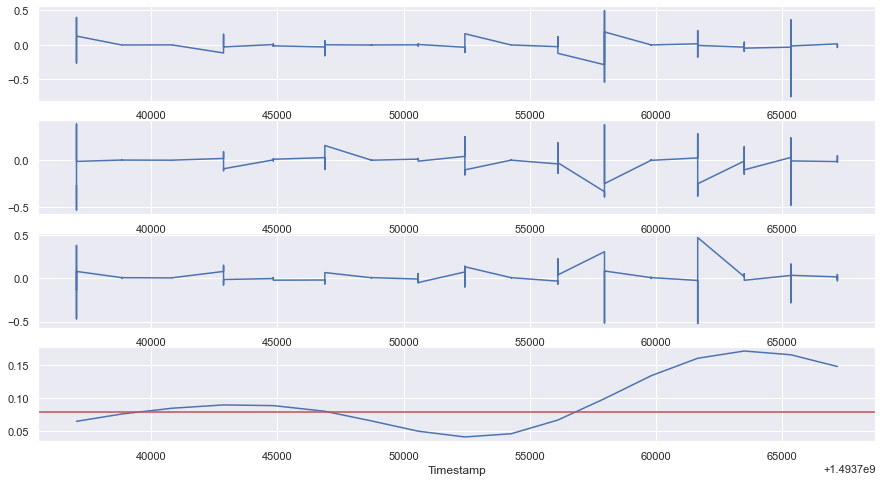

In [13]:
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Timestamp")
ax[0].plot("timestamp","x",data=large_df[large_df['pid']=="BK7610"])
ax[1].plot("timestamp","y",data=large_df[large_df['pid']=="BK7610"])
ax[2].plot("timestamp","z",data=large_df[large_df['pid']=="BK7610"])
ax[3].plot("timestamp",'TAC_Reading', data=large_df[large_df['pid']=="BK7610"])
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

In [14]:
large_df.timestamp.dtype

dtype('int64')

##  Sampling for 800 rows -> 20 seconds of timestamp 

<ipython-input-15-cb14841ac0ac>:5: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot("timestamp","x",data=zoomed)
<ipython-input-15-cb14841ac0ac>:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot("timestamp","y",data=zoomed)


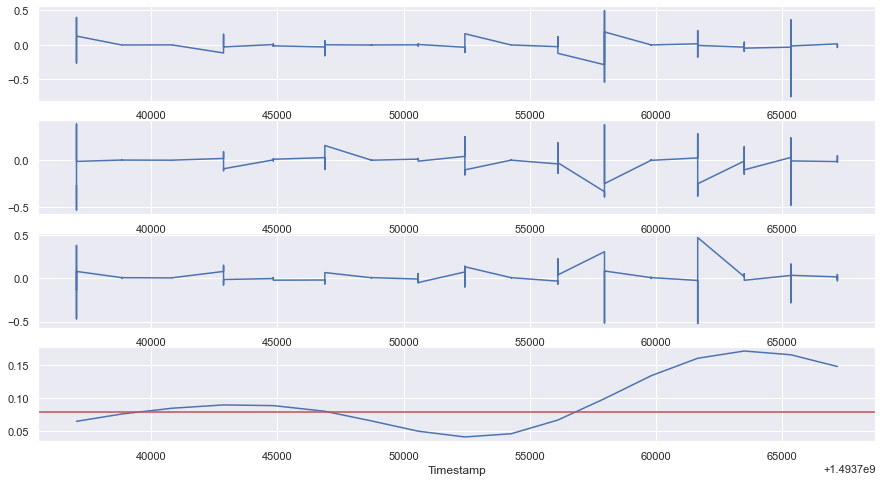

In [15]:
BK7 = large_df[large_df['pid']=="BK7610"]
zoomed = BK7[:800]
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Timestamp")
ax[0].plot("timestamp","x",data=zoomed)
ax[1].plot("timestamp","y",data=zoomed)
ax[2].plot("timestamp","z",data=zoomed)
ax[3].plot("timestamp",'TAC_Reading', data=zoomed)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

<ipython-input-16-19629a461386>:7: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(time,"x",data=zoomed)
<ipython-input-16-19629a461386>:9: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(time,"y",data=zoomed)


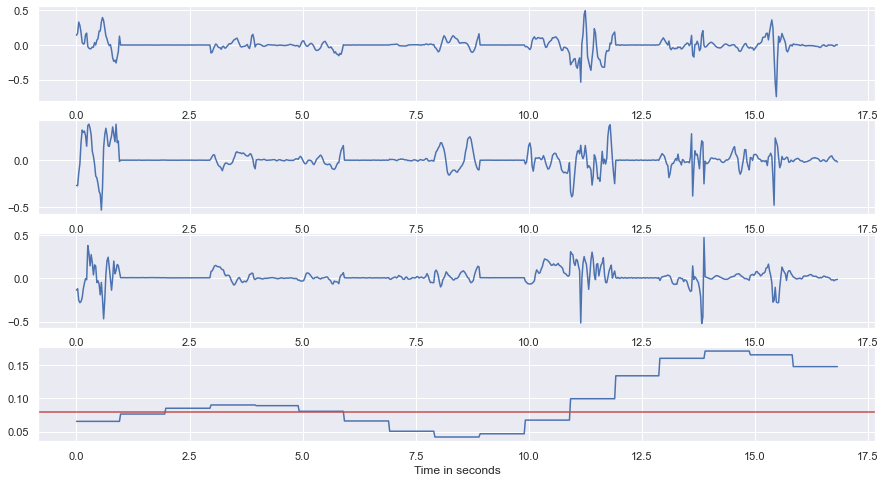

In [16]:
sampling_freq = 40
BK7 = large_df[large_df['pid']=="BK7610"]
zoomed = BK7[:800]
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Time in seconds")
time = np.arange(zoomed['x'].size)/sampling_freq
ax[0].plot(time,"x",data=zoomed)
# ax[0].label(y="x axis")
ax[1].plot(time,"y",data=zoomed)
# plt.ylabel("y axis")
ax[2].plot(time,"z",data=zoomed)
# plt.ylabel("z axis")
ax[3].plot(time,'TAC_Reading', data=zoomed)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

Zooming on 10 seconds

<ipython-input-17-c8f1ed5c67c7>:4: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot("timestamp","x",data=zoomed)
<ipython-input-17-c8f1ed5c67c7>:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot("timestamp","y",data=zoomed)


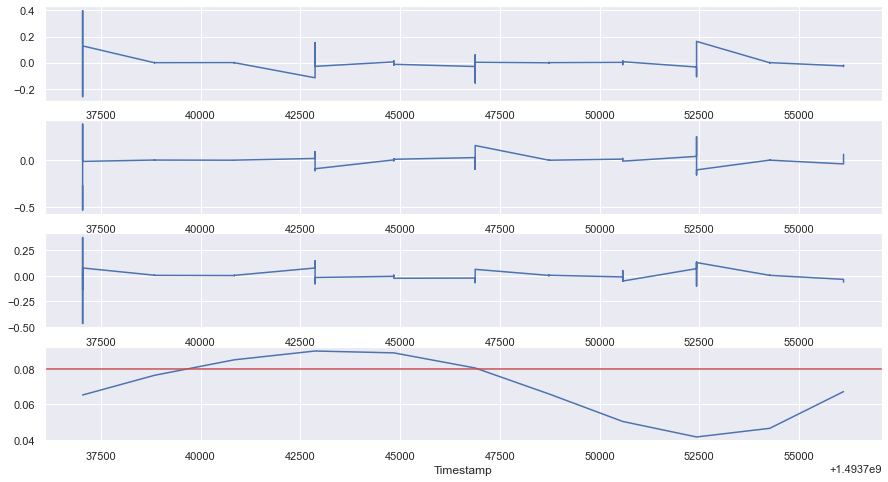

In [17]:
zoomed = BK7[:400]
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Timestamp")
ax[0].plot("timestamp","x",data=zoomed)
ax[1].plot("timestamp","y",data=zoomed)
ax[2].plot("timestamp","z",data=zoomed)
ax[3].plot("timestamp",'TAC_Reading', data=zoomed)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

<ipython-input-18-e2abf304d28f>:5: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(time,"x",data=zoomed)
<ipython-input-18-e2abf304d28f>:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(time,"y",data=zoomed)


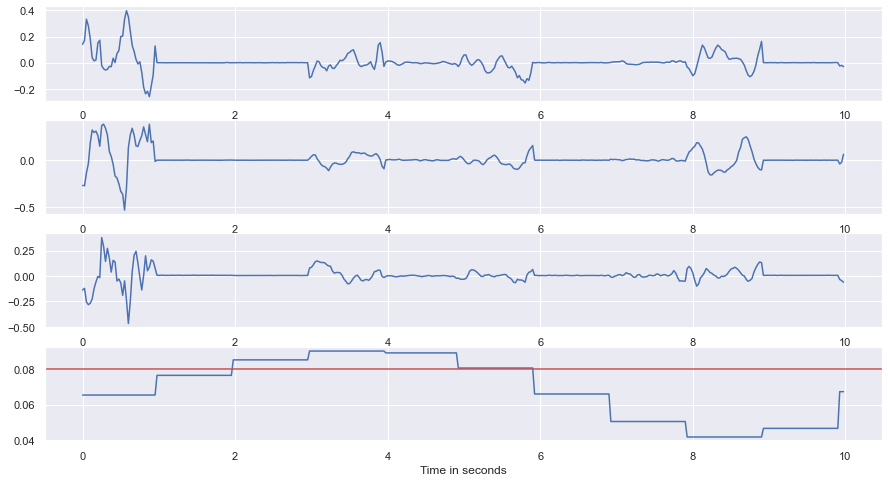

In [18]:
sampling_freq = 40
fig, ax = plt.subplots(4,figsize=(15,8))
plt.xlabel("Time in seconds")
time = np.arange(zoomed['x'].size)/sampling_freq
ax[0].plot(time,"x",data=zoomed)
ax[1].plot(time,"y",data=zoomed)
ax[2].plot(time,"z",data=zoomed)
ax[3].plot(time,'TAC_Reading', data=zoomed)
ax[3].axhline(y=0.08, color='r', linestyle='-')
plt.show()

### Spliting Training & Test according to participants

In [19]:
participants = list(pids)
print(participants)

['BK7610', 'BU4707', 'CC6740', 'DC6359', 'DK3500', 'HV0618', 'JB3156', 'JR8022', 'MC7070', 'MJ8002', 'PC6771', 'SA0297', 'SF3079']


In [85]:
random.seed(100)
def Diff(li1, li2):
  return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

In [86]:
p_tr_index = random.sample(range(1, 13), 9)  # 70%13 = 9.1~9
p_te_index = Diff(list(range(0, 13)),p_tr_index)  #30%13 = 3.9~4

In [87]:
p_tr_index

[3, 8, 11, 12, 7, 6, 9, 4, 1]

In [88]:
p_te=[]
p_tr = []
for index in p_tr_index:
    p_tr.append(participants[index])
for index in p_te_index:
    p_te.append(participants[index])

In [89]:
p_tr

['DC6359',
 'MC7070',
 'SA0297',
 'SF3079',
 'JR8022',
 'JB3156',
 'MJ8002',
 'DK3500',
 'BU4707']

In [90]:
df_train = pd.DataFrame()
for pid in p_tr:
    tmp = large_df[large_df["pid"]==pid]
    df_train = df_train.append(tmp)

In [91]:
df_train

,timestamp,TAC_Reading,time,pid,x,y,z,label
0,1493748079,0.122072,1493748079007,DC6359,0.0081,-0.0063,-0.0106,1
1,1493748079,0.122072,1493748079039,DC6359,0.0069,-0.0109,-0.0092,1
2,1493748079,0.122072,1493748079059,DC6359,-0.0012,-0.0004,0.0076,1
3,1493748079,0.122072,1493748079097,DC6359,-0.0098,0.0121,-0.0065,1
4,1493748079,0.122072,1493748079118,DC6359,-0.0103,0.0298,0.0124,1
...,...,...,...,...,...,...,...,...
232,1493754265,0.046559,1493754265899,BU4707,-0.1110,0.0593,-0.0076,0
233,1493754265,0.046559,1493754265924,BU4707,-0.0346,0.0581,0.0428,0
234,1493754265,0.046559,1493754265949,BU4707,-0.0171,0.0288,0.0553,0
235,1493754265,0.046559,1493754265974,BU4707,-0.0354,-0.0062,0.0595,0


In [92]:
df_test = pd.DataFrame()
for pid in p_te:
    tmp = large_df[large_df["pid"]==pid]
    df_test = df_test.append(tmp)

In [93]:
df_test

,timestamp,TAC_Reading,time,pid,x,y,z,label
0,1493737046,0.065357,1493737046023,BK7610,0.1410,-0.2686,-0.1372,0
1,1493737046,0.065357,1493737046063,BK7610,0.1714,-0.2722,-0.1208,0
2,1493737046,0.065357,1493737046073,BK7610,0.3328,-0.1353,-0.2548,0
3,1493737046,0.065357,1493737046101,BK7610,0.2822,-0.0375,-0.2816,0
4,1493737046,0.065357,1493737046134,BK7610,0.1847,0.1813,-0.2680,0
...,...,...,...,...,...,...,...,...
595,1493805699,0.006193,1493805699881,HV0618,-0.0013,0.0000,0.0063,0
596,1493805699,0.006193,1493805699905,HV0618,-0.0010,-0.0001,0.0075,0
597,1493805699,0.006193,1493805699932,HV0618,-0.0011,-0.0006,0.0061,0
598,1493805699,0.006193,1493805699957,HV0618,-0.0013,0.0002,0.0071,0


# Window size = 5 seconds 
5 seconds = 40*5 samples = 200 samples
<br>
step_size = 25 (Since the data is taken at 25 miliseconds)

In [172]:
x_list = []
y_list = []
z_list = []
train_labels = []
window_size = 200
step_size = 25

for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['x'].values[i: i + 200]
    ys = df_train['y'].values[i: i + 200]
    zs = df_train['z'].values[i: i + 200]
    label = (df_train['label'][i: i + 200]).max()
    #label = 1 if (df_train['label'][i: i + 200]).mean() >=0.4 else 0
    #print(label)

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

In [173]:
len(train_labels)

124

In [174]:
# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

In [175]:
# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/200)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/200)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/200))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/200)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/200)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/200))

In [176]:
X_train

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,x_energy,y_energy,z_energy,avg_result_accl,sma
0,0.002858,-0.004241,0.001358,0.019215,0.015764,0.022025,0.011005,0.009745,0.015183,-0.0912,...,1.237656,-0.060987,7.819703,8.777219,1.991038,0.000377,0.000266,0.000487,0.024102,0.036593
1,0.001722,-0.003740,0.002285,0.018506,0.014564,0.021579,0.010004,0.008475,0.014171,-0.0912,...,1.668557,-0.195743,8.833924,11.829341,2.367811,0.000345,0.000226,0.000471,0.022324,0.033809
2,0.001029,-0.003508,0.002052,0.018321,0.014454,0.021655,0.009474,0.008255,0.014526,-0.0912,...,1.681576,-0.136619,9.107801,12.153048,2.300647,0.000337,0.000221,0.000473,0.021976,0.033131
3,-0.003733,0.000265,-0.001616,0.029723,0.025888,0.030546,0.015491,0.012638,0.018555,-0.1488,...,3.332516,-2.578019,8.180174,14.849228,14.892888,0.000897,0.000670,0.000936,0.029397,0.044948
4,-0.011624,0.008930,0.000775,0.037393,0.034100,0.035972,0.025434,0.022793,0.021714,-0.1488,...,2.043923,-1.402722,2.780519,4.492727,8.592464,0.001533,0.001243,0.001295,0.039539,0.060952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-0.000350,0.018479,0.010260,0.061192,0.082895,0.054999,0.032447,0.049970,0.030843,-0.2881,...,0.811622,0.418227,4.877566,5.288963,4.994918,0.003745,0.007213,0.003130,0.071457,0.103748
120,-0.000559,0.020861,0.015734,0.062241,0.087968,0.063086,0.035408,0.057486,0.041939,-0.2881,...,0.635495,0.296320,4.397806,3.737297,2.410649,0.003874,0.008174,0.004227,0.085698,0.124480
121,-0.000549,0.021136,0.015516,0.062459,0.088120,0.064819,0.036708,0.057673,0.044871,-0.2881,...,0.620938,0.281745,4.296350,3.684501,1.933857,0.003901,0.008212,0.004442,0.089574,0.130474
122,0.002319,0.023252,0.015863,0.060848,0.087874,0.065597,0.034937,0.058241,0.046482,-0.2881,...,0.565362,0.246311,4.994550,3.693414,1.719981,0.003708,0.008263,0.004555,0.091158,0.132755


In [177]:
len(x_list)

124

In [178]:
X_train.shape

(124, 50)

# Fourier Transform

C:\Users\prara\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


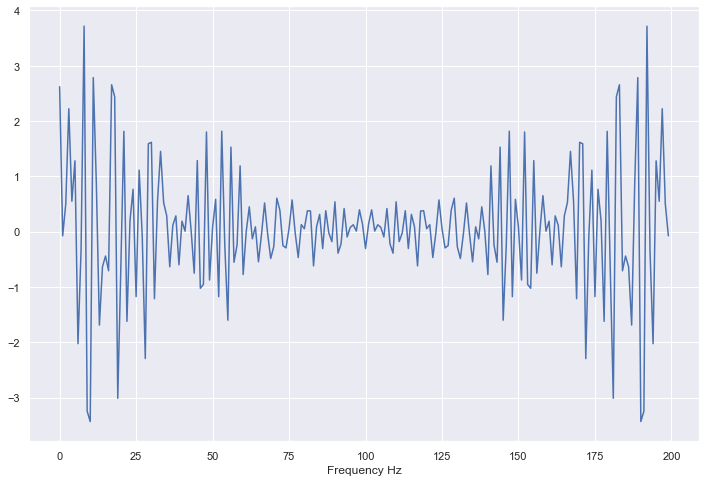

In [179]:
pd.Series(np.fft.fft(pd.Series(x_list)[42])).plot()
plt.xlabel("Frequency Hz")
plt.show()

##### the signal is symmetric about the center, so we can take only first half of the wave

C:\Users\prara\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


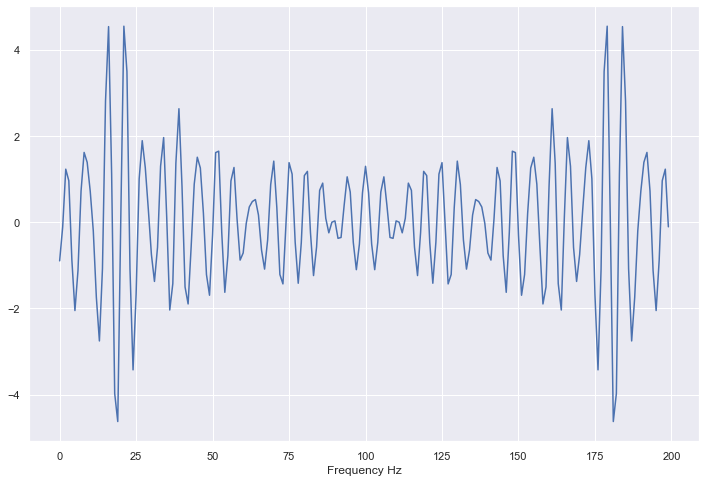

In [180]:
pd.Series(np.fft.fft(pd.Series(x_list)[25])).plot()
plt.xlabel("Frequency Hz")
plt.show()

In [181]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [182]:
X_train

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,0.002858,-0.004241,0.001358,0.019215,0.015764,0.022025,0.011005,0.009745,0.015183,-0.0912,...,0.300536,0.259187,-1.146063,-0.248213,-1.091532,0.243707,0.135577,0.341467,0.804457,1.265199
1,0.001722,-0.003740,0.002285,0.018506,0.014564,0.021579,0.010004,0.008475,0.014171,-0.0912,...,-0.073459,0.257871,-0.673796,-0.450754,-1.203549,0.227921,0.123548,0.342067,0.784182,1.249293
2,0.001029,-0.003508,0.002052,0.018321,0.014454,0.021655,0.009474,0.008255,0.014526,-0.0912,...,-0.462789,0.332055,-0.596763,-0.216832,-1.155324,0.223253,0.122352,0.341494,0.780966,1.243338
3,-0.003733,0.000265,-0.001616,0.029723,0.025888,0.030546,0.015491,0.012638,0.018555,-0.1488,...,0.346387,0.675058,-1.148881,-1.201094,-0.531643,0.594482,0.377456,0.632556,1.180977,1.929531
4,-0.011624,0.008930,0.000775,0.037393,0.034100,0.035972,0.025434,0.022793,0.021714,-0.1488,...,1.402281,0.852368,0.997793,1.023430,-0.116842,0.977272,0.727381,0.812065,1.396752,2.238430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-0.000350,0.018479,0.010260,0.061192,0.082895,0.054999,0.032447,0.049970,0.030843,-0.2881,...,-0.082356,0.442940,-0.567875,-0.945515,0.016954,2.141773,4.600810,1.979207,2.889011,4.534597
120,-0.000559,0.020861,0.015734,0.062241,0.087968,0.063086,0.035408,0.057486,0.041939,-0.2881,...,-0.053325,0.105604,-0.150558,-1.037786,-0.694111,2.153925,5.232413,2.669463,3.049561,4.819731
121,-0.000549,0.021136,0.015516,0.062459,0.088120,0.064819,0.036708,0.057673,0.044871,-0.2881,...,0.039667,0.284557,-0.186573,-1.030109,-0.701606,2.166747,5.241466,2.779785,3.075252,4.860309
122,0.002319,0.023252,0.015863,0.060848,0.087874,0.065597,0.034937,0.058241,0.046482,-0.2881,...,0.237166,0.479445,-1.096429,-0.825869,-0.508904,2.010287,5.191379,2.820235,3.057522,4.812796


# Transform the X_test similarly

In [183]:
x_list = []
y_list = []
z_list = []
test_labels = []
window_size = 200
step_size = 25

for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['x'].values[i: i + 200]
    ys = df_test['y'].values[i: i + 200]
    zs = df_test['z'].values[i: i + 200]
    label = (df_test['label'][i: i + 200]).max()
    #label = 1 if (df_train['label'][i: i + 400]).mean() >=0.4 else 0

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    test_labels.append(label)

In [184]:
len(test_labels)

107

In [185]:
# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

In [186]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/200)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/200)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/200))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/200)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/200)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/200))

In [187]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [188]:
X_test.shape

(107, 94)

In [189]:
X_train.shape

(124, 94)

# Logistic Model


In [190]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [191]:
len(y_test)

107

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, y_train)

y_pred = lr.predict(X_train_data_lr)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test_data_lr)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy is: 0.9354838709677419

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.93      0.98      0.96        87

    accuracy                           0.94       124
   macro avg       0.94      0.91      0.92       124
weighted avg       0.94      0.94      0.93       124

Accuracy is: 0.8411214953271028

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        47
           1       0.88      0.83      0.85        60

    accuracy                           0.84       107
   macro avg       0.84      0.84      0.84       107
weighted avg       0.84      0.84      0.84       107



In [193]:
X_train

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,0.002858,-0.004241,0.001358,0.019215,0.015764,0.022025,0.011005,0.009745,0.015183,-0.0912,...,0.300536,0.259187,-1.146063,-0.248213,-1.091532,0.243707,0.135577,0.341467,0.804457,1.265199
1,0.001722,-0.003740,0.002285,0.018506,0.014564,0.021579,0.010004,0.008475,0.014171,-0.0912,...,-0.073459,0.257871,-0.673796,-0.450754,-1.203549,0.227921,0.123548,0.342067,0.784182,1.249293
2,0.001029,-0.003508,0.002052,0.018321,0.014454,0.021655,0.009474,0.008255,0.014526,-0.0912,...,-0.462789,0.332055,-0.596763,-0.216832,-1.155324,0.223253,0.122352,0.341494,0.780966,1.243338
3,-0.003733,0.000265,-0.001616,0.029723,0.025888,0.030546,0.015491,0.012638,0.018555,-0.1488,...,0.346387,0.675058,-1.148881,-1.201094,-0.531643,0.594482,0.377456,0.632556,1.180977,1.929531
4,-0.011624,0.008930,0.000775,0.037393,0.034100,0.035972,0.025434,0.022793,0.021714,-0.1488,...,1.402281,0.852368,0.997793,1.023430,-0.116842,0.977272,0.727381,0.812065,1.396752,2.238430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-0.000350,0.018479,0.010260,0.061192,0.082895,0.054999,0.032447,0.049970,0.030843,-0.2881,...,-0.082356,0.442940,-0.567875,-0.945515,0.016954,2.141773,4.600810,1.979207,2.889011,4.534597
120,-0.000559,0.020861,0.015734,0.062241,0.087968,0.063086,0.035408,0.057486,0.041939,-0.2881,...,-0.053325,0.105604,-0.150558,-1.037786,-0.694111,2.153925,5.232413,2.669463,3.049561,4.819731
121,-0.000549,0.021136,0.015516,0.062459,0.088120,0.064819,0.036708,0.057673,0.044871,-0.2881,...,0.039667,0.284557,-0.186573,-1.030109,-0.701606,2.166747,5.241466,2.779785,3.075252,4.860309
122,0.002319,0.023252,0.015863,0.060848,0.087874,0.065597,0.034937,0.058241,0.046482,-0.2881,...,0.237166,0.479445,-1.096429,-0.825869,-0.508904,2.010287,5.191379,2.820235,3.057522,4.812796


## SVM MODEL

In [194]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
svc.fit(X_train_data_lr, y_train)

SVC(kernel='linear')

In [195]:
y_pred_svm_train = svc.predict(X_train_data_lr)
y_pred_svm_test = svc.predict(X_test_data_lr)

In [196]:
print("Accuracy is:", accuracy_score(y_train, y_pred_svm_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_svm_train))

Accuracy is: 0.9596774193548387

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.96      0.99      0.97        87

    accuracy                           0.96       124
   macro avg       0.96      0.94      0.95       124
weighted avg       0.96      0.96      0.96       124



In [197]:
print("Accuracy is:", accuracy_score(y_test, y_pred_svm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_svm_test))

Accuracy is: 0.8504672897196262

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        47
           1       0.92      0.80      0.86        60

    accuracy                           0.85       107
   macro avg       0.85      0.86      0.85       107
weighted avg       0.86      0.85      0.85       107



## Naive Bayes

In [198]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb = GaussianNB()
param = {'var_smoothing': np.logspace(0,-11,num=100)}
gs_nb = GridSearchCV(estimator=nb, 
                 param_grid=param, 
                # cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')
#gs_nb = nb
gs_nb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.2s finished


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 7.74263683e-01, 5.99484250e-01, 4.64158883e-01,
       3.59381366e-01, 2.78255940e-01, 2.15443469e-01, 1.66810054e-01,
       1.29154967e-01, 1.00000000e-01, 7.74263683e-02, 5.99484250e-02,
       4.64158883e-02, 3.59381366e-02, 2.78255940e-02, 2.15443469e-02,
       1.66810054e-02, 1.29154967e-02, 1.0000000...
       3.59381366e-09, 2.78255940e-09, 2.15443469e-09, 1.66810054e-09,
       1.29154967e-09, 1.00000000e-09, 7.74263683e-10, 5.99484250e-10,
       4.64158883e-10, 3.59381366e-10, 2.78255940e-10, 2.15443469e-10,
       1.66810054e-10, 1.29154967e-10, 1.00000000e-10, 7.74263683e-11,
       5.99484250e-11, 4.64158883e-11, 3.59381366e-11, 2.78255940e-11,
       2.15443469e-11, 1.66810054e-11, 1.29154967e-11, 1.00000000e-11])},
             scoring='accuracy', verbose=1)

In [199]:
y_pred_nb_train = gs_nb.predict(X_train)
y_pred_nb_test = gs_nb.predict(X_test)

In [200]:
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train,zero_division = 0))

Accuracy is: 0.6774193548387096

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.44      0.30      0.35        37
           1       0.74      0.84      0.78        87

    accuracy                           0.68       124
   macro avg       0.59      0.57      0.57       124
weighted avg       0.65      0.68      0.66       124



In [201]:
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test,zero_division = 0))

Accuracy is: 0.5607476635514018

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.56      1.00      0.72        60

    accuracy                           0.56       107
   macro avg       0.28      0.50      0.36       107
weighted avg       0.31      0.56      0.40       107



In [202]:
X_train.shape

(124, 94)

In [ ]:
#New dataset with 27 features

In [165]:
features = ['y_std', 'z_std', 'y_aad', 'z_aad', 'y_max', 'z_neg_count', 'y_pos_count', 'z_pos_count', 'x_peak_count', 'y_peak_count', 'z_peak_count', 'x_kurtosis', 'y_kurtosis', 'z_kurtosis', 'z_mean_fft', 'y_std_fft', 'z_std_fft', 'y_aad_fft', 'z_aad_fft', 'z_min_fft', 'y_max_fft', 'z_max_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft', 'y_mad_fft', 'y_IQR_fft', 'z_peak_count_fft']

In [320]:
X_train_new = X_train[features]
X_test_new = X_test[features]
X_train_new.shape

(124, 27)

In [210]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_data_lr = scaler.transform(X_train_new)
X_test_data_lr = scaler.transform(X_test_new)
svc.fit(X_train_data_lr, y_train)

SVC(kernel='linear')

In [211]:
y_pred_svm_train = svc.predict(X_train_data_lr)
y_pred_svm_test = svc.predict(X_test_data_lr)

In [212]:
print("Accuracy is:", accuracy_score(y_test, y_pred_svm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_svm_test))

Accuracy is: 0.7570093457943925

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.66      0.94      0.77        47
           1       0.93      0.62      0.74        60

    accuracy                           0.76       107
   macro avg       0.79      0.78      0.76       107
weighted avg       0.81      0.76      0.75       107



In [257]:
X_train.shape

(124, 94)

In [230]:
y_train.shape

(124,)

LSTM

In [334]:
from keras.models import Sequential
from keras.layers import MaxPooling1D, Dense, LSTM, Reshape, Dropout

In [332]:
# reshape input to be [samples, time steps, features]
trainX = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
testX = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

In [341]:
# create and fit the LSTM network
model = Sequential()
#model.add(Bidirectional(LSTM(10, input_shape=(1,X_train.shape[1]),activation='relu',return_sequences=True)))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'linear'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
model.fit(trainX, y_train, epochs=10, batch_size = 1)
#y_pred_lstm = model.predict(trainX)

Epoch 1/10
124/124 [==============================] - 2s 2ms/step - loss: 0.2984 - accuracy: 0.7016
Epoch 2/10
124/124 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.7016
Epoch 3/10
124/124 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.7016
Epoch 4/10
124/124 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.7016
Epoch 5/10
124/124 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.7016
Epoch 6/10
124/124 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.7016
Epoch 7/10
124/124 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.7016
Epoch 8/10
124/124 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.7016 ETA: 0s - loss: 0.2340 - accuracy
Epoch 9/10
124/124 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.7016
Epoch 10/10
124/124 [==============================] - 0s 2ms/step

In [342]:
model.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (1, 128)                  114176    
_________________________________________________________________
dropout_3 (Dropout)          (1, 128)                  0         
_________________________________________________________________
dense_79 (Dense)             (1, 1)                    129       
_________________________________________________________________
dense_80 (Dense)             (1, 1)                    2         
Total params: 114,307
Trainable params: 114,307
Non-trainable params: 0
_________________________________________________________________


In [343]:
y_pred_lstm = model.predict(trainX)
y_pred_lstm_test = model.predict(testX)

In [344]:
print("Accuracy is:", accuracy_score(y_test, y_pred_lstm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_lstm_test))

Accuracy is: 0.5607476635514018

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.56      1.00      0.72        60

    accuracy                           0.56       107
   macro avg       0.28      0.50      0.36       107
weighted avg       0.31      0.56      0.40       107



In [345]:
#LSTM with feature selection

In [346]:
# reshape input to be [samples, time steps, features]
trainXnew = np.array(X_train_new).reshape((X_train_new.shape[0], 1, X_train_new.shape[1]))
testXnew = np.array(X_test_new).reshape((X_test_new.shape[0], 1, X_test_new.shape[1]))

In [347]:
# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(1,X_train_new.shape[1]),activation='relu',return_sequences=True)))
#model.add(Bidirectional(LSTM(10, input_shape=(1,X_train.shape[1]),activation='relu',return_sequences=True)))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(trainXnew, y_train, epochs=50, batch_size = 1)
#y_pred_lstm = model.predict(trainX)

Epoch 1/50
124/124 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 2/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 3/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 4/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 5/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 6/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 7/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 8/50
124/124 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 9/50
124/124 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7016
Epoch 10/50
124/124 [==============================] - 0s 4ms/st

In [348]:
y_pred_lstm = model.predict(trainXnew)
y_pred_lstm_test = model.predict(testXnew)

In [349]:
print("Accuracy is:", accuracy_score(y_test, y_pred_lstm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_lstm_test))

Accuracy is: 0.5607476635514018

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.56      1.00      0.72        60

    accuracy                           0.56       107
   macro avg       0.28      0.50      0.36       107
weighted avg       0.31      0.56      0.40       107



#modelling only with frequency features# takes too long to run


## Window size = 10 seconds
10 seconds = 40*10 samples = 400 samples
step_size = 25 (Since the data is taken at 25 miliseconds)

In [48]:
x_list = []
y_list = []
z_list = []
train_labels = []
window_size = 400
step_size = 25

for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['x'].values[i: i + 400]
    ys = df_train['y'].values[i: i + 400]
    zs = df_train['z'].values[i: i + 400]
    #label = (df_train['label'][i: i + 400]).max()
    label = 1 if (df_train['label'][i: i + 400]).mean() >=0.5 else 0


    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

In [49]:
# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

In [50]:
# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/400)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/400)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/400))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/400)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/400)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/400))

C:\Users\prara\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


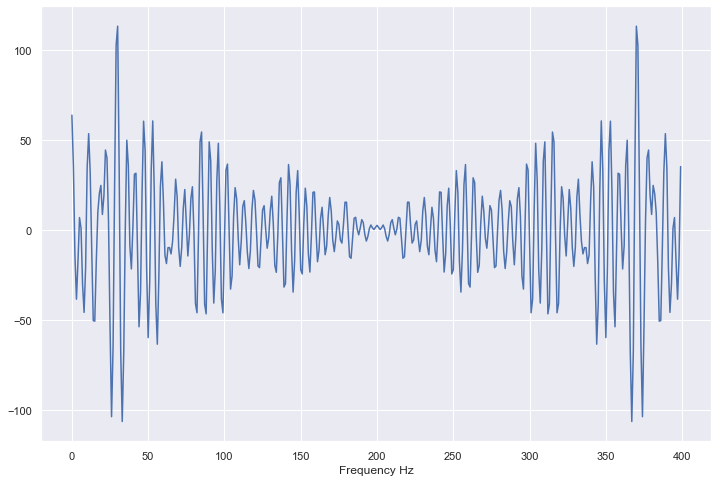

In [51]:
#FOURIER TRANSFORM
pd.Series(np.fft.fft(pd.Series(x_list)[42])).plot()
plt.xlabel("Frequency Hz")
plt.show()

C:\Users\prara\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


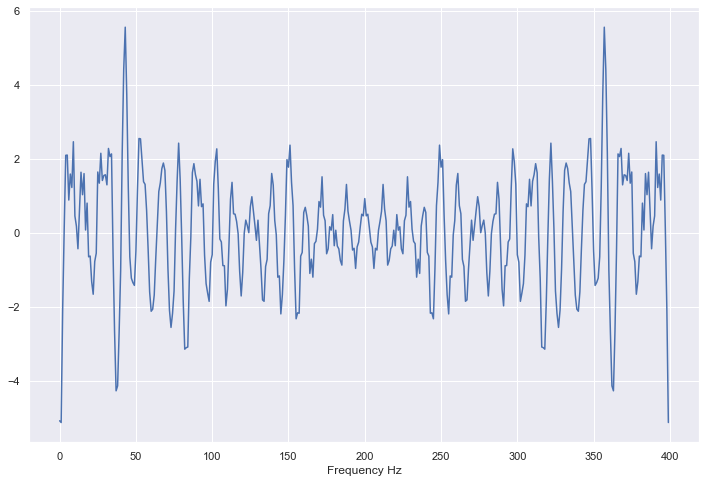

In [52]:
pd.Series(np.fft.fft(pd.Series(x_list)[25])).plot()
plt.xlabel("Frequency Hz")
plt.show()

In [53]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [54]:
x_list = []
y_list = []
z_list = []
test_labels = []
window_size = 400
step_size = 25

for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['x'].values[i: i + 400]
    ys = df_test['y'].values[i: i + 400]
    zs = df_test['z'].values[i: i + 400]
    label = (df_test['label'][i: i + 400]).max()

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    test_labels.append(label)

In [55]:
# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

In [56]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/400)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/400)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/400))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/400)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/400)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/400))

In [57]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/400)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/400)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/400))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/400)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/400)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/400))

In [58]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [60]:
X_train.shape

(116, 94)

In [61]:
X_test.shape

(72, 94)

In [59]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Logistic Regression

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_data_lr, y_train)

y_pred = lr.predict(X_train_data_lr)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test_data_lr)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy is: 0.9913793103448276

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.99      1.00      1.00       103

    accuracy                           0.99       116
   macro avg       1.00      0.96      0.98       116
weighted avg       0.99      0.99      0.99       116

Accuracy is: 0.7361111111111112

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.83      0.22      0.34        23
           1       0.73      0.98      0.83        49

    accuracy                           0.74        72
   macro avg       0.78      0.60      0.59        72
weighted avg       0.76      0.74      0.68        72



## SVM

In [93]:
#svm
#alternate
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred_svm_train = svc.predict(X_train)
y_pred_svm_test = svc.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_svm_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_svm_train))

print("Accuracy is:", accuracy_score(y_test, y_pred_svm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_svm_test))

Accuracy is: 0.8879310344827587

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.89      1.00      0.94       103

    accuracy                           0.89       116
   macro avg       0.44      0.50      0.47       116
weighted avg       0.79      0.89      0.84       116

Accuracy is: 0.6805555555555556

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.68      1.00      0.81        49

    accuracy                           0.68        72
   macro avg       0.34      0.50      0.40        72
weighted avg       0.46      0.68      0.55        72



C:\Users\prara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb_train = nb.predict(X_train)
y_pred_nb_test = nb.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train))
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test))

Accuracy is: 0.41379310344827586

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.15      0.92      0.26        13
           1       0.97      0.35      0.51       103

    accuracy                           0.41       116
   macro avg       0.56      0.64      0.39       116
weighted avg       0.88      0.41      0.49       116

Accuracy is: 0.3194444444444444

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.32      1.00      0.48        23
           1       0.00      0.00      0.00        49

    accuracy                           0.32        72
   macro avg       0.16      0.50      0.24        72
weighted avg       0.10      0.32      0.15        72



C:\Users\prara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
#modified naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb = GaussianNB()
param = {'var_smoothing': np.logspace(0,-9,num=100)}
gs_nb = GridSearchCV(estimator=nb, 
                 param_grid=param, 
             #    cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')
gs_nb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.7s finished


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [96]:
y_pred_nb_train = gs_nb.predict(X_train)
y_pred_nb_test = gs_nb.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train,zero_division=1))
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test,zero_division=1))

Accuracy is: 0.8879310344827587

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        13
           1       0.89      1.00      0.94       103

    accuracy                           0.89       116
   macro avg       0.94      0.50      0.47       116
weighted avg       0.90      0.89      0.84       116

Accuracy is: 0.6805555555555556

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        23
           1       0.68      1.00      0.81        49

    accuracy                           0.68        72
   macro avg       0.84      0.50      0.40        72
weighted avg       0.78      0.68      0.55        72



## window size = 2 sec
Window size = 2 seconds 2 seconds = 40*2 samples = 80 samples step_size = 25 (Since the data is taken at 25 miliseconds)

In [62]:
x_list = []
y_list = []
z_list = []
train_labels = []
window_size = 80
step_size = 25

for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['x'].values[i: i + 80]
    ys = df_train['y'].values[i: i + 80]
    zs = df_train['z'].values[i: i + 80]
    label = (df_train['label'][i: i + 80]).max()

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

In [63]:
# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

In [64]:
# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/80)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/80)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/80))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/80)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/80)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/80))


In [65]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [66]:
x_list = []
y_list = []
z_list = []
test_labels = []
window_size = 80
step_size = 25

for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['x'].values[i: i +80]
    ys = df_test['y'].values[i: i + 80]
    zs = df_test['z'].values[i: i + 80]
    label = (df_test['label'][i: i + 80]).max()

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    test_labels.append(label)

In [67]:
# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

In [68]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/80)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/80)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/80))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/80)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/80)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/80))


In [69]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/80)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/80)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/80))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/80)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/80)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/80))

In [70]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [72]:
X_train.shape

(128, 94)

In [73]:
X_test.shape

(85, 94)

In [71]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [83]:
#logistic regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_data_lr, y_train)

y_pred = lr.predict(X_train_data_lr)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test_data_lr)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy is: 0.8984375

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        62
           1       0.91      0.89      0.90        66

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128

Accuracy is: 0.7647058823529411

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        64
           1       0.52      0.52      0.52        21

    accuracy                           0.76        85
   macro avg       0.68      0.68      0.68        85
weighted avg       0.76      0.76      0.76        85



In [81]:
#svm

#svm
#alternate
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred_svm_train = svc.predict(X_train)
y_pred_svm_test = svc.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_svm_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_svm_train))

print("Accuracy is:", accuracy_score(y_test, y_pred_svm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_svm_test))

Accuracy is: 0.5625

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.65      0.21      0.32        62
           1       0.55      0.89      0.68        66

    accuracy                           0.56       128
   macro avg       0.60      0.55      0.50       128
weighted avg       0.60      0.56      0.50       128

Accuracy is: 0.24705882352941178

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.25      1.00      0.40        21

    accuracy                           0.25        85
   macro avg       0.12      0.50      0.20        85
weighted avg       0.06      0.25      0.10        85



C:\Users\prara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb_train = nb.predict(X_train)
y_pred_nb_test = nb.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train))
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test))

Accuracy is: 0.609375

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.77      0.27      0.40        62
           1       0.58      0.92      0.71        66

    accuracy                           0.61       128
   macro avg       0.67      0.60      0.56       128
weighted avg       0.67      0.61      0.56       128

Accuracy is: 0.24705882352941178

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.25      1.00      0.40        21

    accuracy                           0.25        85
   macro avg       0.12      0.50      0.20        85
weighted avg       0.06      0.25      0.10        85



C:\Users\prara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
#modified naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb = GaussianNB()
param = {'var_smoothing': np.logspace(0,-9,num=100)}
gs_nb = GridSearchCV(estimator=nb, 
                 param_grid=param, 
             #    cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')
gs_nb.fit(X_train, y_train)
y_pred_nb_train = gs_nb.predict(X_train)
y_pred_nb_test = gs_nb.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train,zero_division=1))
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test,zero_division=1))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is: 0.609375

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.77      0.27      0.40        62
           1       0.58      0.92      0.71        66

    accuracy                           0.61       128
   macro avg       0.67      0.60      0.56       128
weighted avg       0.67      0.61      0.56       128

Accuracy is: 0.24705882352941178

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        64
           1       0.25      1.00      0.40        21

    accuracy                           0.25        85
   macro avg       0.62      0.50      0.20        85
weighted avg       0.81      0.25      0.10        85



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.9s finished


## modellig with window size = 3
Window size = 3 seconds 3 seconds = 40*13 samples = 120 samples step_size = 25 (Since the data is taken at 25 miliseconds)

In [84]:
x_list = []
y_list = []
z_list = []
train_labels = []
window_size = 120
step_size = 25

for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['x'].values[i: i + 120]
    ys = df_train['y'].values[i: i + 120]
    zs = df_train['z'].values[i: i + 120]
    label = (df_train['label'][i: i + 120]).max()

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

In [86]:
# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

In [87]:
# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/120)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/120)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/120))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/120)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/120)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/120))

In [88]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [89]:
x_list = []
y_list = []
z_list = []
test_labels = []
window_size = 120
step_size = 25

for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['x'].values[i: i + 120]
    ys = df_test['y'].values[i: i + 120]
    zs = df_test['z'].values[i: i + 120]
    label = (df_test['label'][i: i + 120]).max()

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    test_labels.append(label)

In [90]:
# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

In [91]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/120)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/120)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/120))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/120)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/120)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/120))

In [92]:
# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/120)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/120)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/120))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/120)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/120)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/120))

In [93]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:26])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/25)
X_test['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/25))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/25)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/25)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/25))

In [94]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_data_lr, y_train)

y_pred = lr.predict(X_train_data_lr)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred))

y_pred = lr.predict(X_test_data_lr)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is:", accuracy)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy is: 0.8740157480314961

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.88      0.90      0.89        73

    accuracy                           0.87       127
   macro avg       0.87      0.87      0.87       127
weighted avg       0.87      0.87      0.87       127

Accuracy is: 0.8433734939759037

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        57
           1       0.81      0.65      0.72        26

    accuracy                           0.84        83
   macro avg       0.83      0.79      0.81        83
weighted avg       0.84      0.84      0.84        83



In [96]:
#svm
#alternate
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred_svm_train = svc.predict(X_train)
y_pred_svm_test = svc.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_svm_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_svm_train))

print("Accuracy is:", accuracy_score(y_test, y_pred_svm_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_svm_test))

Accuracy is: 0.6141732283464567

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.60      0.28      0.38        54
           1       0.62      0.86      0.72        73

    accuracy                           0.61       127
   macro avg       0.61      0.57      0.55       127
weighted avg       0.61      0.61      0.58       127

Accuracy is: 0.3132530120481928

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.31      1.00      0.48        26

    accuracy                           0.31        83
   macro avg       0.16      0.50      0.24        83
weighted avg       0.10      0.31      0.15        83



C:\Users\prara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb_train = nb.predict(X_train)
y_pred_nb_test = nb.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train))
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test))

Accuracy is: 0.6535433070866141

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.71      0.31      0.44        54
           1       0.64      0.90      0.75        73

    accuracy                           0.65       127
   macro avg       0.67      0.61      0.59       127
weighted avg       0.67      0.65      0.62       127

Accuracy is: 0.3132530120481928

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.31      1.00      0.48        26

    accuracy                           0.31        83
   macro avg       0.16      0.50      0.24        83
weighted avg       0.10      0.31      0.15        83



C:\Users\prara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
#modified naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb = GaussianNB()
param = {'var_smoothing': np.logspace(0,-9,num=100)}
gs_nb = GridSearchCV(estimator=nb, 
                 param_grid=param, 
             #    cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy')
gs_nb.fit(X_train, y_train)
y_pred_nb_train = gs_nb.predict(X_train)
y_pred_nb_test = gs_nb.predict(X_test)
print("Accuracy is:", accuracy_score(y_train, y_pred_nb_train))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, y_pred_nb_train,zero_division=1))
print("Accuracy is:", accuracy_score(y_test, y_pred_nb_test))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred_nb_test,zero_division=1))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is: 0.6535433070866141

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.71      0.31      0.44        54
           1       0.64      0.90      0.75        73

    accuracy                           0.65       127
   macro avg       0.67      0.61      0.59       127
weighted avg       0.67      0.65      0.62       127

Accuracy is: 0.3132530120481928

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        57
           1       0.31      1.00      0.48        26

    accuracy                           0.31        83
   macro avg       0.66      0.50      0.24        83
weighted avg       0.78      0.31      0.15        83



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished
